# CNN 모델 구성

## 시뮬레이션 데이터에 대한 CNN 모델 구성

시뮬레이션 데이터 불러오기

In [1]:
!unzip data.zip

Archive:  data.zip
  inflating: 45_35_unmasked.jpg      
  inflating: 45_36_unmasked.jpg      
  inflating: 45_37_unmasked.jpg      
  inflating: 45_38_unmasked.jpg      
  inflating: 45_39_unmasked.jpg      
  inflating: 45_40_unmasked.jpg      
  inflating: 45_41_unmasked.jpg      
  inflating: 45_42_unmasked.jpg      
  inflating: 45_43_unmasked.jpg      
  inflating: 45_44_unmasked.jpg      
  inflating: 45_45_unmasked.jpg      
  inflating: 45_46_unmasked.jpg      
  inflating: 45_47_unmasked.jpg      
  inflating: 45_48_unmasked.jpg      
  inflating: 45_49_unmasked.jpg      
  inflating: 45_50_unmasked.jpg      
  inflating: 45_51_unmasked.jpg      
  inflating: 45_52_unmasked.jpg      
  inflating: 45_53_unmasked.jpg      
  inflating: 46_36_unmasked.jpg      
  inflating: 46_37_unmasked.jpg      
  inflating: 46_38_unmasked.jpg      
  inflating: 46_39_unmasked.jpg      
  inflating: 46_40_unmasked.jpg      
  inflating: 46_41_unmasked.jpg      
  inflating: 46_42_unmasked.jpg

In [2]:
import os
import cv2
X = []
y = []
for item in os.listdir():
    if 'unmasked' not in item: continue
    fig = cv2.imread(item)
    fig = fig[174:174+250, 174:174+250]
    X.append(fig/255)
    y.append(item.split('.')[0].split('_')[:2])

In [3]:
import numpy as np

X = np.array(X)
y = np.array(y, dtype='uint8')
print(X.shape, y.shape)

(589, 250, 250, 3) (589, 2)


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 222784)            0

In [6]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

In [7]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5), loss='mse', metrics=['mae', 'mse'])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
history = model.fit(X_train, y_train, epochs=128, batch_size=20, validation_data=[X_test, y_test], callbacks=[early_stopping, reduce_lr])

Epoch 1/128
24/24 [==============================] - 7s 104ms/step - loss: 3573.5171 - mae: 58.9747 - mse: 3573.5171 - val_loss: 3573.8025 - val_mae: 58.9857 - val_mse: 3573.8025 - lr: 1.0000e-05
Epoch 2/128
24/24 [==============================] - 1s 36ms/step - loss: 3452.3423 - mae: 57.9248 - mse: 3452.3423 - val_loss: 3423.5415 - val_mae: 57.6750 - val_mse: 3423.5415 - lr: 1.0000e-05
Epoch 3/128
24/24 [==============================] - 1s 37ms/step - loss: 3286.4971 - mae: 56.4472 - mse: 3286.4971 - val_loss: 3234.6960 - val_mae: 55.9495 - val_mse: 3234.6960 - lr: 1.0000e-05
Epoch 4/128
24/24 [==============================] - 1s 36ms/step - loss: 3082.2190 - mae: 54.5120 - mse: 3082.2190 - val_loss: 3007.7598 - val_mae: 53.7661 - val_mse: 3007.7598 - lr: 1.0000e-05
Epoch 5/128
24/24 [==============================] - 1s 36ms/step - loss: 2837.1055 - mae: 52.0713 - mse: 2837.1055 - val_loss: 2737.7212 - val_mae: 50.9968 - val_mse: 2737.7212 - lr: 1.0000e-05
Epoch 6/128
24/24 [=====

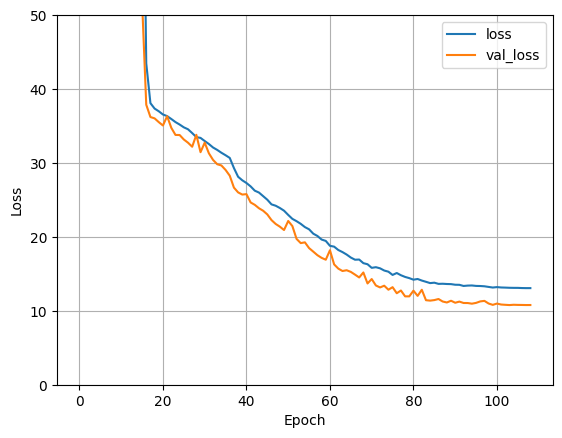

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 50])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()